# U.S. Medical Insurance Costs
Project proposed by the CodeAcademy course "Data and Programming Foundations for AI" to test my knowledge so far.

### 1. Looking over at the files.
The project uses a single .csv file from Codecademy. This file contains a dataset of patients, their personal characteristics, and their medical insurance costs. Each row represents a single patient, and the columns are separated by commas.



### 2. Project Scope

This project aims to answer the following questions:

1.  Is there a significant difference in insurance costs between sexes?
2.  How does each variable (age, BMI, children, smoker status, region) relate to the insurance cost?
3.  Which factor has the strongest impact on insurance costs, and which has the weakest?
4.  Which US region has the highest average insurance cost?

### 3. Importing and Visualizing the Data

To import the data, we will use the **pandas** library, the standard tool for data analysis in Python. For visualization, we will use the **matplotlib** and **seaborn** libraries to create plots and charts that will help us answer our project questions.

In [35]:
#Importing the libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The `pd.read_csv()` function will load the dataset into a DataFrame, which we will store in the df variable. Then, we will use the `.head()`, `.info()`, and `.describe()` methods to get some initial information about our data.

In [36]:
df = pd.read_csv("insurance.csv")
print("First Five rows of our DataSet:")
print(df.head())

First Five rows of our DataSet:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [74]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [45]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


To check for dupliccates entries, we gonna use the command `.duplicated()`. To remove the duplicated entry we gonna use the command `.drop_duplicates()`.

In [39]:
print(f"Number of duplicated entries: {df.duplicated().sum()}")
print(df[df.duplicated()])

Number of duplicated entries: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [40]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now that we have a clean DataFrame (no duplicates, no NULL values) we can proccede to the next step, the EDA.

### 3. Explanatory Data Analysis (EDA)

In this section, we'll analyze the relationships between variables to find evidence that answers our initial project questions.

Our first question is: Is there a significant difference in insurance costs between sexes?

To answer this, we will compare the distribution of charges for males and females. While a visualization like a boxplot gives a great overview, calculating the average cost for each group provides a more precise numerical answer. We can accomplish this by grouping the data with the .groupby('sex') method and then calculating the average with .mean().

In [50]:
avg_cost_by_sex = df.groupby('sex')['charges'].mean()
print(avg_cost_by_sex)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


For the visualization, a boxplot is the best choice.

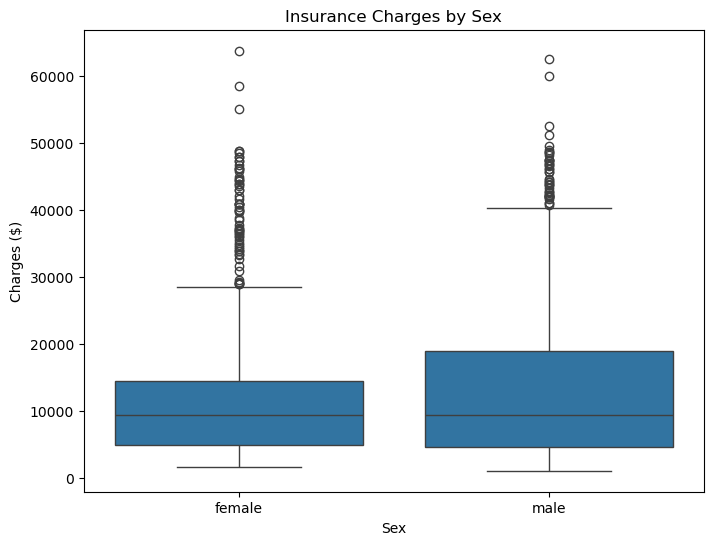

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Insurance Charges by Sex')
plt.ylabel('Charges ($)')
plt.xlabel('Sex')
plt.show()

Based on the visualization, the distributions of charges for both sexes are very similar, including their medians and overall spread. Although men pay slightly more on average, the significant overlap between the two groups suggests that **sex is not a major driver of insurance costs**.

The second question is: **How does each variable relate to the insurance cost?**

To answer this, we will examine each feature's relationship with the charges. We'll begin with the numerical variables: 'age' and 'bmi'. A scatter plot is the ideal visualization for this, as it is designed to show the relationship and potential trends between two numerical variables.

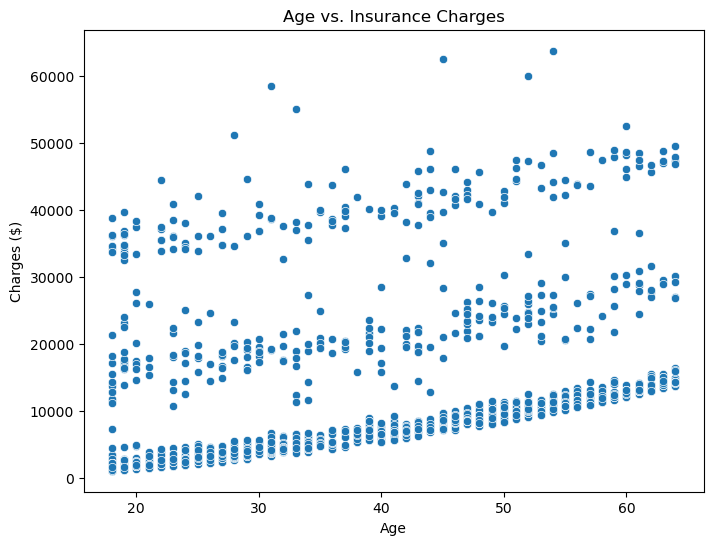

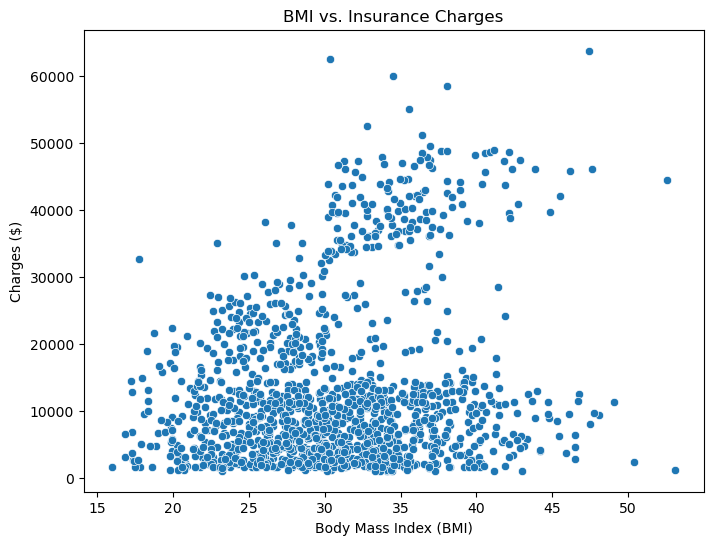

In [59]:
#Age vs Charge
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges ($)')
plt.show()

#BMI vs Charge
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Insurance Charges')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Charges ($)')
plt.show()

The scatter plots show clear positive correlations. As age increases, insurance costs consistently rise. BMI has a similar, but weaker, positive trend. **Both variables impact the final cost, but age has a stronger impact than BMI**.

Next, to analyze the categorical variables: 'children', 'smoker', and 'region'. A boxplot is the ideal choice, and it's visualization is perfect for comparing the distribution of numerical data across several different groups.

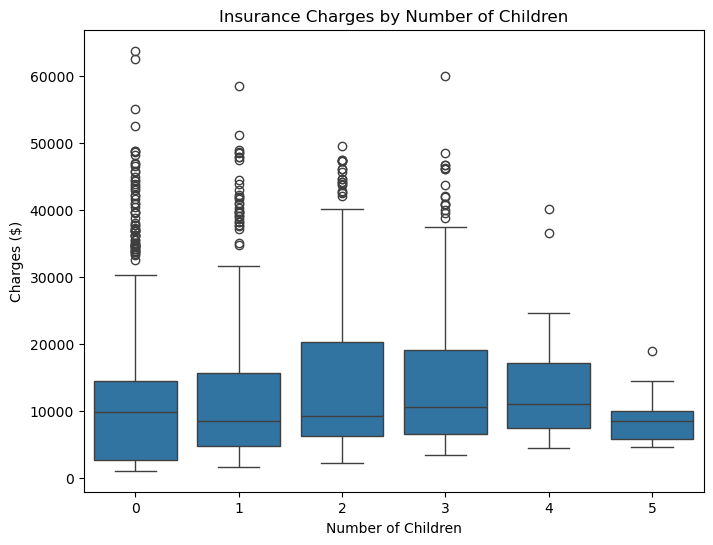

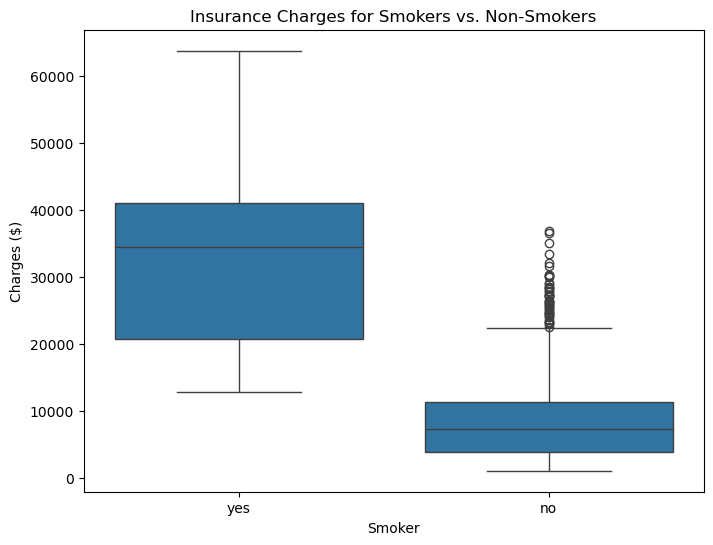

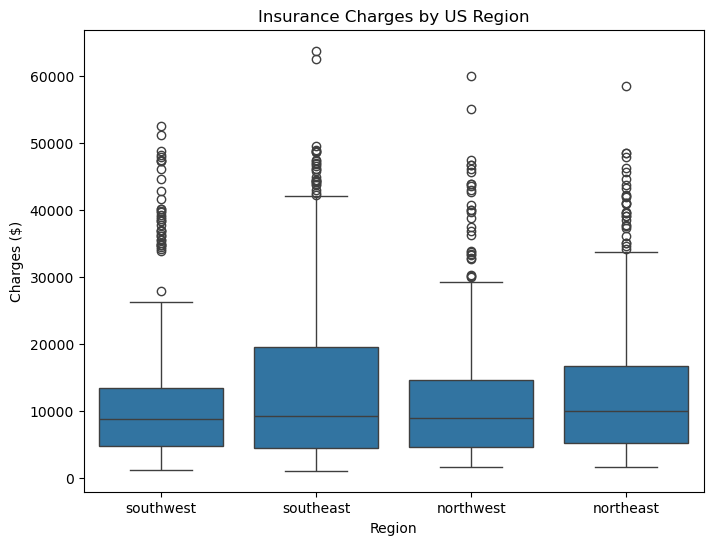

In [71]:
#Children vs Charge
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges ($)')
plt.show()

#Smoker vs Charge
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.show()

#Region vs Charge
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Insurance Charges by US Region')
plt.xlabel('Region')
plt.ylabel('Charges ($)')
plt.show()

The boxplots for 'children' and 'region' show that **neither variable has a strong impact on insurance costs**. This is evident from the significant overlap in their data distributions and the lack of a clear trend in their median charges.

In stark contrast, the findings for smoker status are dramatic. The boxplot for smokers is significantly higher than for non-smokers, with virtually no overlap between the two groups. This clearly indicates that **smoking is a major factor in determining insurance costs**.

The next question is: **Which factor has the strongest impact on insurance costs?**

To answer this question, the `heatmap` is the best choice because it provides a clear, numerical comparison of how strongly each variable relates to the insurance charges in a single visualization.

To include the 'smoker' variable in the heatmap, we first needed to convert its text-based 'yes' and 'no' values into a numerical format, as the correlation calculation only works with numbers. We achieved this through a process called encoding, mapping 'yes' to 1 and 'no' to 0. We applied the same logic to the 'sex' variable, converting 'male' to 1 and 'female' to 0. This essential step allowed us to numerically measure the impact of these crucial factors in the heatmap alongside variables like age and BMI.

 The 'region' variable was excluded from this final heatmap for clarity, as our initial boxplot analysis already confirmed it has a negligible effect on the final cost.


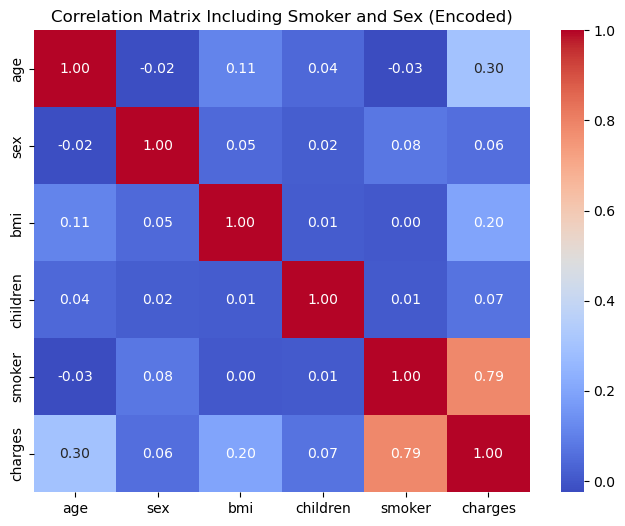

In [75]:
df_encoded = df.copy()

# Convert 'smoker' column: 'yes' becomes 1, 'no' becomes 0
df_encoded['smoker'] = df_encoded['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# Convert 'sex' column: 'male' becomes 1, 'female' becomes 0
df_encoded['sex'] = df_encoded['sex'].apply(lambda x: 1 if x == 'male' else 0)

# Now both 'smoker' and 'sex' are numerical columns, we create a new correlation matrix that includes them
correlation_matrix_encoded = df_encoded.select_dtypes(include=['float64', 'int64']).corr()

# Visualize the new matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Smoker and Sex (Encoded)')
plt.show()

This grid provides an instant visual summary of the relationships between our variables. The color of each square indicates the direction and strength of the correlation, while the number inside provides the precise value.

Ranking of Factors by Impact:

1.  ***Strongest Impact:*** **Smoker Status**
    * This is the single most significant factor, with a strong positive correlation (**+0.79**) to insurance charges.

2.  ***Moderate Impact:*** **Age & BMI**
    * Both have a clear positive relationship with costs, though significantly weaker than smoking. `Age` (**+0.30**) has a stronger impact than `BMI` (**+0.20**).

3.  ***Negligible Impact:*** **Sex & Number of Children**
    * These variables have a correlation close to zero, confirming they have almost no effect on the final insurance cost.

And the final question is: **Which US region has the highest average insurance cost?**

To answer this, we will calculate the average insurance cost for each region. In addition to the direct numerical comparison, we will use a bar plot to visualize the findings, making it easy to see which region is the most expensive on average.

region
southwest    12346.937377
northwest    12417.575374
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64


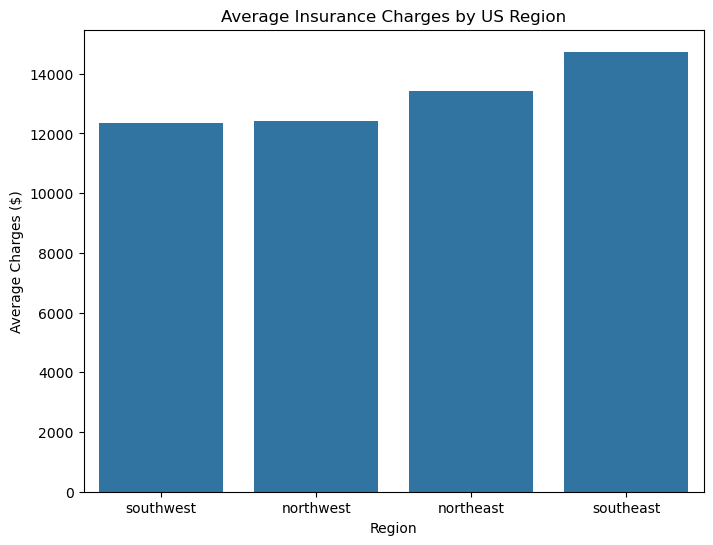

In [73]:
avg_cost_by_region = df.groupby('region')['charges'].mean().sort_values()
print(avg_cost_by_region)

# Visualize the average cost per region
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_cost_by_region.index, y=avg_cost_by_region.values)
plt.title('Average Insurance Charges by US Region')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.show()

The bar plot and numerical analysis clearly show that the southeast region has the highest average insurance cost. A likely explanation for this finding is that the southeast also has a higher average BMI and a greater proportion of smokers.

### 4. Conclusions

After analyzing the data, we found clear answers to our initial questions:

* **Smoking is the most important factor.** Smokers pay significantly more for insurance than non-smokers.
* **Age and BMI are the next biggest factors.** Costs go up as people get older or have a higher BMI.
* **Other variables have little effect.** A person's sex, number of children, and region do not have a strong impact on their insurance costs.
* The **southeast region has the highest average costs**, likely because the data for that region includes more smokers and people with a higher BMI.





With all initial questions answered, this concludes the project.